<a href="https://colab.research.google.com/github/thmainagig/AssemblyScriptContract/blob/main/nobel_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

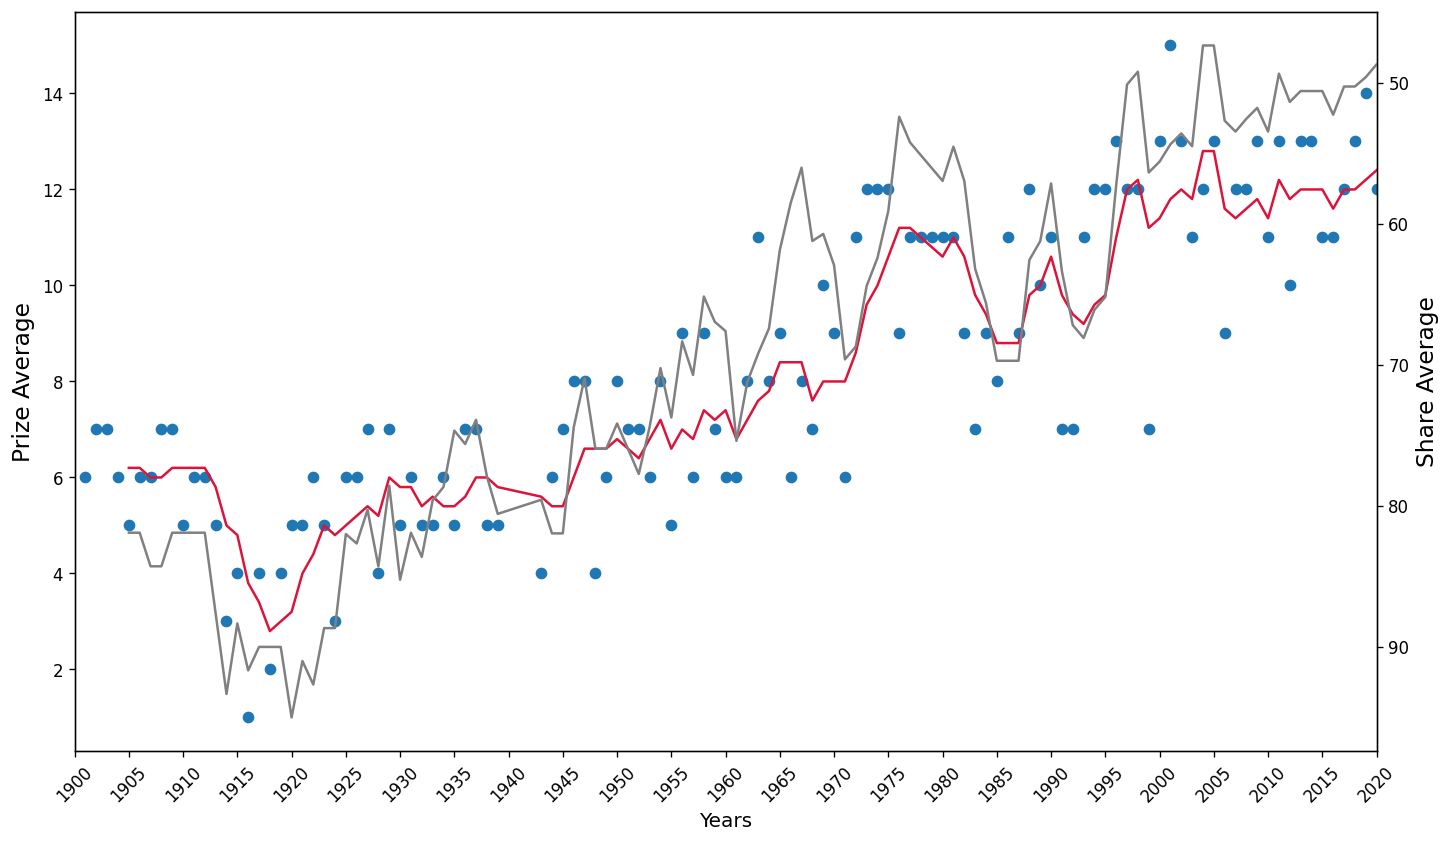

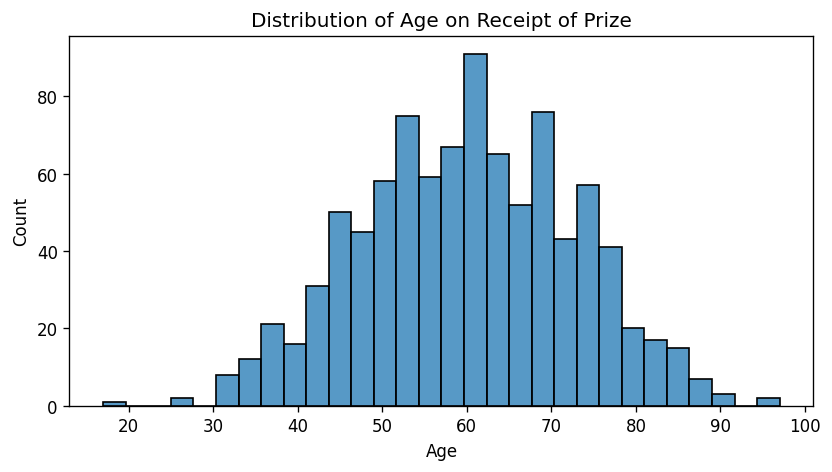

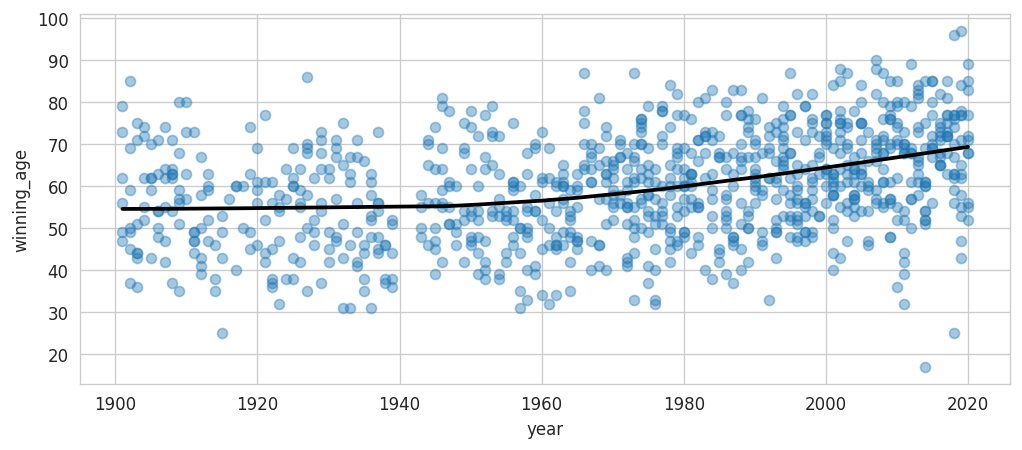

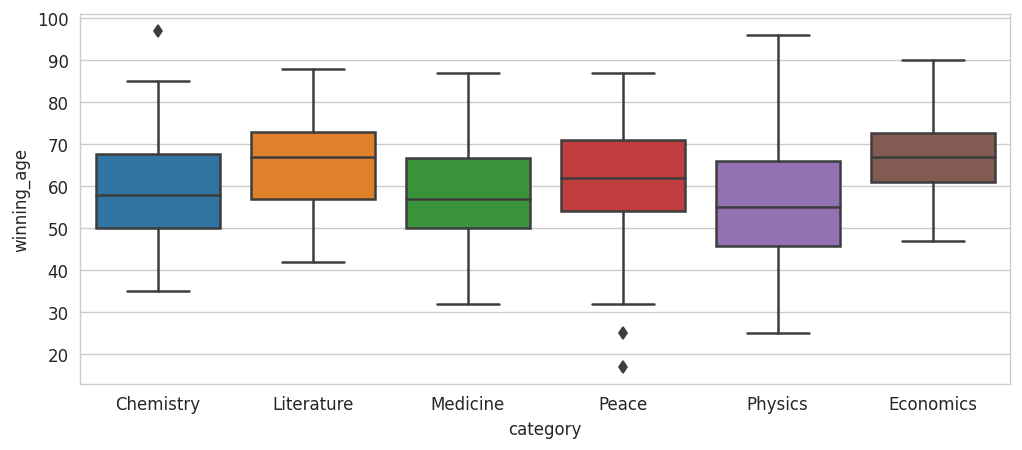

<Figure size 1200x480 with 0 Axes>

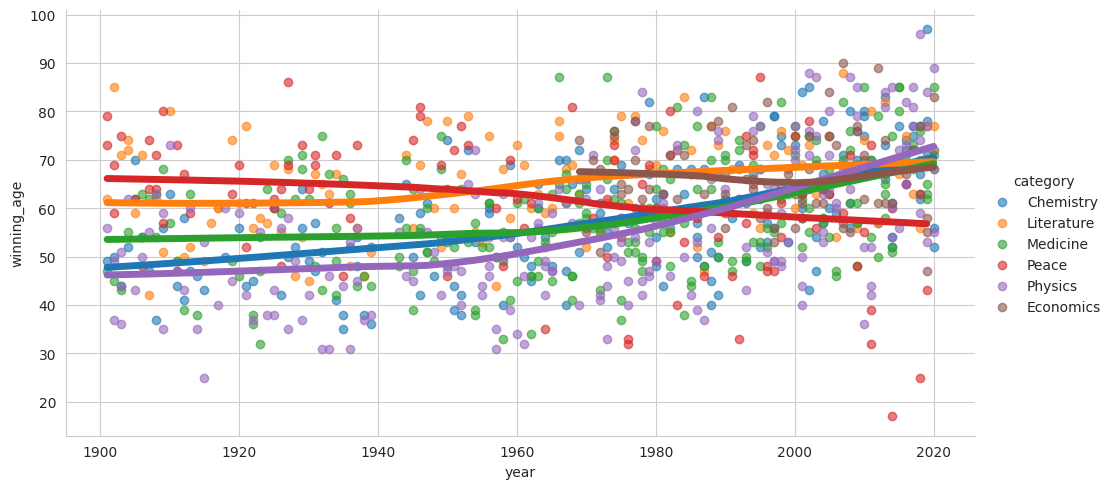

In [36]:
from matplotlib import colors
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns

nobel = pd.read_csv('/content/Nobel Prize/nobel_prize_data.csv')
nobel.sort_values('year', ascending=True).tail()
nobel.isna().any()
nobel.head()
nobel.birth_date=pd.to_datetime(nobel.birth_date)
split_shares = nobel.prize_share.str.split('/', expand=True)
numerator = pd.to_numeric(split_shares[0])
denominator = pd.to_numeric(split_shares[1])
nobel['share_pct'] = (numerator/denominator) * 100
nobel.head()

px.pie(nobel,names=nobel.sex, values=nobel.share_pct, hole=.3)
nobel[nobel['sex']== 'Female'].sort_values('year',ascending=True)
nobel[nobel.duplicated('full_name', keep=False)]
nobel.category.nunique()
h_bar = px.bar(nobel, y=nobel.index, x=nobel.category, color=nobel.category, color_continuous_scale='Aggrnyl')
h_bar.update_layout(yaxis_title='Number of Prize Category', xaxis_title='Category')
nobel[nobel.category == 'Economics']
men_vs_women = nobel.groupby(['category', 'sex'], as_index=False).agg({'prize':pd.Series.count})
men_vs_women.sort_values('prize', ascending=False)
px.bar(men_vs_women, x=men_vs_women.category, y=men_vs_women.prize, color=men_vs_women.sex)
nobel[nobel.full_name.duplicated()].nunique()
prize_year = nobel.groupby('year').count().prize
moving_avg = prize_year.rolling(window=5).mean()
year_avg_share = nobel.groupby('year').agg({'share_pct':pd.Series.mean})
moving_share = year_avg_share.rolling(window=5).mean()
plt.figure(figsize=(14,8), dpi=120)
plt.xticks(np.arange(1900, 2021, step=5), rotation=45)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Prize Average', fontsize=14)
ax1 = plt.gca()
ax2 = plt.twinx()
ax1.set_xlim(1900, 2020)
ax2.invert_yaxis()
ax2.set_ylabel('Share Average', fontsize=14)
ax1.scatter(x=prize_year.index, y=prize_year.values)
ax1.plot(prize_year.index, moving_avg.values, color='crimson')
ax2.plot(prize_year.index, moving_share.values, color='grey')
top_20_countries = nobel.groupby(['birth_country_current'], as_index=False).agg({'prize':pd.Series.count})
n_bar = px.bar(top_20_countries, x=top_20_countries.prize, y=top_20_countries.birth_country_current, orientation='h', title='Top 20 countries by Nobel Prize', color=top_20_countries.prize, color_continuous_scale='Viridis')
n_bar.update_layout(coloraxis_showscale=False)
n_bar.show()
df_countries = nobel.groupby(['birth_country_current', 'ISO'], as_index=False).agg({'prize':pd.Series.count})
df_countries.sort_values('prize', ascending=False)
world_map = px.choropleth(df_countries, locations=df_countries.ISO, color=df_countries.prize, hover_name=df_countries.birth_country_current,
                          color_continuous_scale=px.colors.sequential.matter)
world_map.update_layout(coloraxis_showscale=True)
world_map.show()
df_country_per_cat = nobel.groupby(['birth_country_current', 'category'], as_index=False).agg({'prize':pd.Series.count})
meg_country = pd.merge(df_country_per_cat, top_20_countries, on='birth_country_current')
meg_country.columns=['birth_country_current', 'category', 'category_prize', 'total_prize']
category_bar = px.bar(meg_country, x=meg_country.category_prize, y=meg_country.birth_country_current, color=meg_country.category, orientation='h', title='Top Countries by Category and Prize')
category_bar.update_layout(xaxis_title='Number of Prizes', yaxis_title='Country')
category_bar.show()
prize_per_year = nobel.groupby(['birth_country_current', 'year'], as_index=False).count()
prize_per_year.sort_values('year')[['year', 'birth_country_current', 'prize']]
cumulative_prizes = prize_per_year.groupby(['birth_country_current', 'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)
l_chart = px.line(cumulative_prizes, x='year', y='prize', color='birth_country_current', hover_name='birth_country_current')
l_chart.update_layout(xaxis_title='Year', yaxis_title='Number of Prizes')
l_chart.show()
top_orgs = nobel.organization_name.value_counts()[:20]
org_bar = px.bar(top_orgs, x=top_orgs.values, y=top_orgs.index, orientation='h', color=top_orgs.values, color_continuous_scale=px.colors.sequential.haline, title='Top 20 Research Institutes')
org_bar.update_layout(xaxis_title='Prize', yaxis_title='University', coloraxis_showscale=False)
org_bar.show()
laureate_city = nobel.organization_city.value_counts()[:20]
lau_city_bar = px.bar(laureate_city, x=laureate_city.values, y=laureate_city.index, orientation='h', color=laureate_city.values, color_continuous_scale=px.colors.sequential.Plasma)
lau_city_bar.update_layout(xaxis_title='Prizes', yaxis_title='Organization City', title='Cities with most research.', coloraxis_showscale=False)
lau_city_bar.show()
lau_birth = nobel.birth_city.value_counts()[:20]
lau_birth.sort_values(ascending=False, inplace=True)
birth_city_bar = px.bar(lau_birth, x=lau_birth.values, y=lau_birth.index, orientation='h', color=lau_birth.values, color_continuous_scale=px.colors.sequential.Plasma)
birth_city_bar.update_layout(title='Birth City of Laureates', yaxis_title='Birth City', xaxis_title='Number of Prizes', coloraxis_showscale=False)
birth_city_bar.show()
country_city_org = nobel.groupby(['organization_country', 'organization_city', 'organization_name'], as_index=False).agg({'prize':pd.Series.count})
country_city_org = country_city_org.sort_values('prize', ascending=False)
burst = px.sunburst(country_city_org, path=['organization_country', 'organization_city', 'organization_name'], values='prize', title='Birth of Discoveries')
burst.update_layout(xaxis_title='Number of prizes', yaxis_title='City', coloraxis_showscale=False)
burst.show()
birth_years = nobel.birth_date.dt.year
nobel['winning_age']= nobel.year - birth_years
nobel.sort_values('winning_age', ascending=True)
nobel.describe()
plt.figure(figsize=(8,4), dpi=120)
sns.histplot(data=nobel, x=nobel.winning_age, bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()
plt.figure(figsize=(10,4), dpi=120)
with sns.axes_style('whitegrid'):
  sns.regplot(nobel, x='year', y='winning_age', lowess=True, scatter_kws={'alpha':0.4}, line_kws={'color':'black'})
plt.show()
plt.figure(figsize=(10,4), dpi=120)
with sns.axes_style('whitegrid'):
  sns.boxplot(nobel, x='category', y='winning_age')
plt.show()
plt.figure(figsize=(10,4), dpi=120)
with sns.axes_style('whitegrid'):
  sns.lmplot(nobel, x='year', y='winning_age', hue='category', lowess=True, aspect=2, scatter_kws={'alpha':0.6}, line_kws={'linewidth':5})
plt.show()